In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bidi import algorithm as bidialg
import arabic_reshaper
plt.rcParams["font.family"] = "Roboto"
plt.style.use('ggplot')
%matplotlib inline

In [2]:
import six

df = pd.DataFrame()
df['date'] = ['2016-04-01', '2016-04-02', '2016-04-03']
df['calories'] = [2200, 2100, 1500]
df['sleep hours'] = [2200, 2100, 1500]
df['gym'] = [True, False, False]


def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

# render_mpl_table(df, header_columns=0, col_width=2.0)

In [3]:
data_set_list = [
    {'df':pd.DataFrame(), 'year': '2016', 'section': 'STEM', 'ar_label': u'العلمي 2016'},
    {'df':pd.DataFrame(), 'year': '2016', 'section': 'Humanities',  'ar_label': u'الأدبي 2016'},
    {'df':pd.DataFrame(), 'year': '2017', 'section': 'STEM',  'ar_label': u'العلمي 2017'},
    {'df':pd.DataFrame(), 'year': '2017', 'section': 'Humanities',  'ar_label': u'الأدبي 2017'},
    {'df':pd.DataFrame(), 'year': '2018', 'section': 'STEM',  'ar_label': u'العلمي 2018'},
    {'df':pd.DataFrame(), 'year': '2018', 'section': 'Humanities',  'ar_label': u'الأدبي 2018'}
    ]

# TODO: Add to the above list once other data is sorted and cleaned. 
for data_set in data_set_list:
    # Grab data from source
    data_set['df'] = pd.read_excel("sorted_data/Master_" + data_set['section'] + "_clean.xlsx", sheet_name=data_set['year'])

In [4]:
data_set_list_stem = [data_set_list[0], data_set_list[2], data_set_list[4]]
data_set_list[0]['df'].head(10)

,الجنسية,الجنس,المنطقة,حكومي/خاص,المدرسة,النسبة
0,كويتي,بنين,العاصمة,حكــومى,يوسف بن عيسى الثانوية للبنين,74.77
1,كويتي,بنين,العاصمة,حكــومى,يوسف بن عيسى الثانوية للبنين,71.05
2,كويتي,بنين,العاصمة,حكــومى,يوسف بن عيسى الثانوية للبنين,70.82
3,كويتي,بنين,العاصمة,حكــومى,يوسف بن عيسى الثانوية للبنين,94.29
4,كويتي,بنين,العاصمة,حكــومى,يوسف بن عيسى الثانوية للبنين,77.45
5,كويتي,بنين,العاصمة,حكــومى,يوسف بن عيسى الثانوية للبنين,85.50
6,كويتي,بنين,العاصمة,حكــومى,يوسف بن عيسى الثانوية للبنين,77.27
7,كويتي,بنين,العاصمة,حكــومى,يوسف بن عيسى الثانوية للبنين,97.87
8,كويتي,بنين,العاصمة,حكــومى,يوسف بن عيسى الثانوية للبنين,94.89
9,كويتي,بنين,العاصمة,حكــومى,يوسف بن عيسى الثانوية للبنين,78.32


In [6]:
def arabic_text(utext):
    # A handy Arabic text formatter, make sure to use a supported font. 
    reshaped_text = arabic_reshaper.reshape(utext)
    return bidialg.get_display(reshaped_text)

color_list =['#ff5656','#796bf9', '#29a0c6','#ff5656', '#e1e2d0','#d6b5dd', '#c9e0b3','#ccb9ca', '#ddbebe']

In [5]:


def plot_dissection_histogram(dissection_list, data_year, data_section, suptitle, bissection_type, histcolor, axes):
    # Pass a dissected and labelled list of data to plot histograms for and save


    for k, df_pair in enumerate(dissection_list):
        desc = df_pair[0][u'النسبة'].describe() # Pandas provides a handy statistical description of the data
        df_pair[0][u'النسبة'].plot.hist(stacked=True, color=histcolor, bins=100, ax=axes[k]) #2016 color='#815eff', 2017 color: 4286f4
        axes[k].set_title(arabic_text(df_pair[1]), fontname='KacstTitle', y=1.04)
        # draw vertical mean line and fill 1std area
        axes[k].axvline(x=desc['mean'], color='#ff7272', lw=2)
        axes[k].axvspan(desc['mean'] - desc['std'], desc['mean'] + desc['std'], alpha=0.5, color='#919191', zorder=0)
        axes[k].locator_params(axis='y', nbins=2); axes[k].set_xlim([50,100]); axes[k].set_ylim([0,280]); axes[k].set_ylabel('')    

    fig.suptitle(suptitle, fontname='Courier New',fontsize=18, y=1.04)
    fig.tight_layout()
    fig.savefig("Figures/" + data_year + "_" + data_section + "_" + bissection_type + "_" + "Histograms.svg", bbox_inches='tight')

KeyboardInterrupt: 

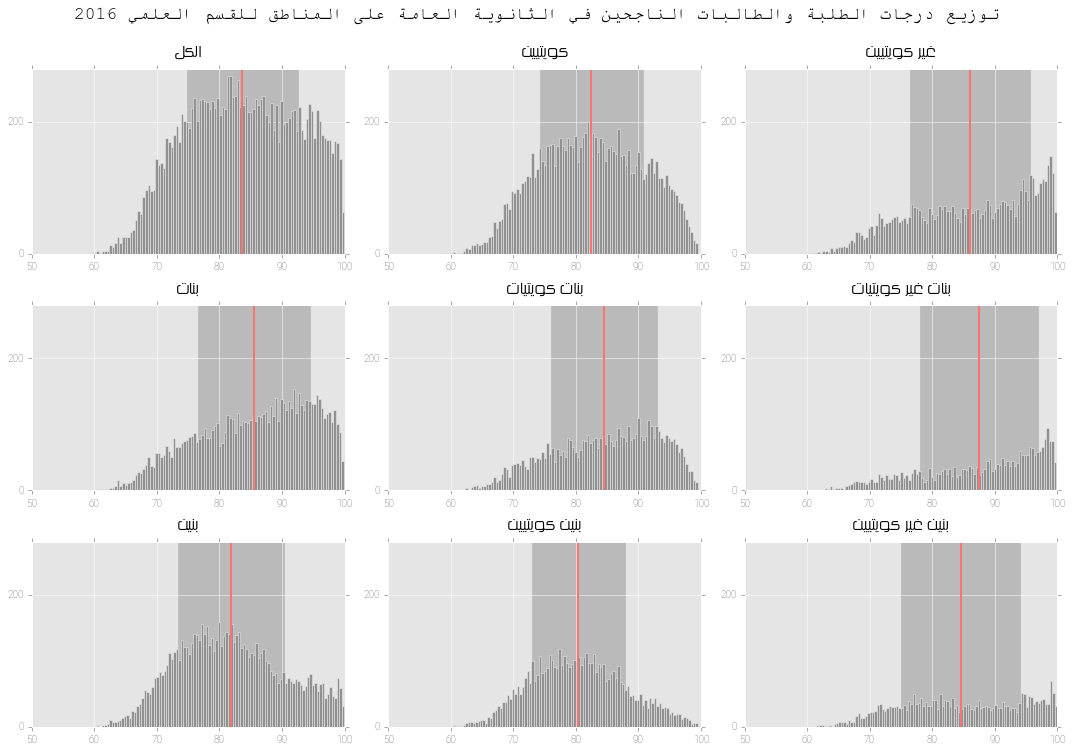

In [15]:
# Gender + Nationality Disection
for k, data_set in enumerate(data_set_list):
    # For each data set compose a 
    dissection_list_ = [ [data_set['df'], u'الكل'], 
                         [data_set['df'].loc[data_set['df'][u'الجنسية'] == u'كويتي'], u'كويتيين'],
                         [data_set['df'].loc[data_set['df'][u'الجنسية'] != u'كويتي'], u'غير كويتيين' ], 
                         [data_set['df'].loc[data_set['df'][u'الجنس'] != u'بنين'], u'بنات'],
                         [data_set['df'].loc[data_set['df'][u'الجنسية'] == u'كويتي'].loc[data_set['df'][u'الجنس'] != u'بنين'],  u'بنات كويتيات'],
                         [data_set['df'].loc[data_set['df'][u'الجنسية'] != u'كويتي'].loc[data_set['df'][u'الجنس'] != u'بنين'],  u'بنات غير كويتيات'],
                         [data_set['df'].loc[data_set['df'][u'الجنس'] == u'بنين'], u'بنين'],
                         [data_set['df'].loc[data_set['df'][u'الجنسية'] == u'كويتي'].loc[data_set['df'][u'الجنس'] == u'بنين'], u'بنين كويتيين'],
                         [data_set['df'].loc[data_set['df'][u'الجنسية'] != u'كويتي'].loc[data_set['df'][u'الجنس'] == u'بنين'], u'بنين غير كويتيين']]
    ncols_ = 3
    nrows_ = 3
    fig, axes = plt.subplots(figsize=(15, 10), nrows=nrows_, ncols=ncols_)
    axes_ = axes.flatten() # flatten axes to easily iterate over
    
    suptitle_ = arabic_text(u'توزيع درجات الطلبة والطالبات الناجحين في الثانوية العامة على المناطق للقسم ' + data_set['ar_label'] )
    bissection_type_ = 'Gender_Nationality'
    plot_dissection_histogram(dissection_list_, data_set['year'], data_set['section'], suptitle_, bissection_type_, color_list[k], fig, axes_)

In [111]:
def plot_dissection_histogram_2(dissection_list, data_year, histcolor, fig, axes, max_val):
    # Pass a dissected and labelled list of data to plot histograms for and save


    for k, df_pair in enumerate(dissection_list):
        desc = df_pair[0][u'النسبة'].describe() # Pandas provides a handy statistical description of the data
        df_pair[0][u'النسبة'].plot.hist(stacked=True, color=histcolor, bins=100, ax=axes[k]) #2016 color='#815eff', 2017 color: 4286f4
        axes[k].set_title(arabic_text(df_pair[1]), fontname='KacstTitle', y=1.04)
        # draw vertical mean line and fill 1std area
        axes[k].axvline(x=desc['mean'], color='#ff7272', lw=2)
        axes[k].axvspan(desc['mean'] - desc['std'], desc['mean'] + desc['std'], alpha=0.5, color='#919191', zorder=0)
        axes[k].locator_params(axis='y', nbins=2); axes[k].set_xlim([50,100]); axes[k].set_ylim([0,max_val]); axes[k].set_ylabel('')
        if k == 0:
            axes[k].set_ylabel(data_year, color='k')



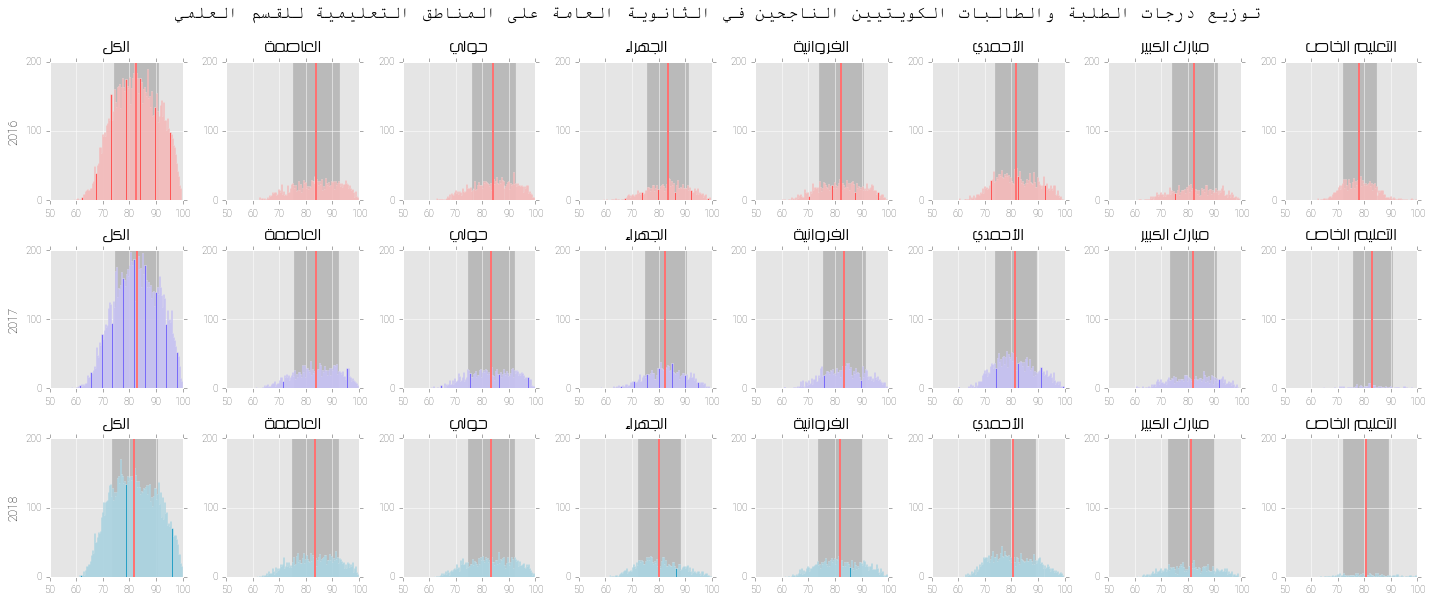

In [114]:
# Kuwait - by Area Dissection
ncols_ = 8
nrows_ = 3
figstem, axesstem = plt.subplots(figsize=(20, 8), nrows=nrows_, ncols=ncols_) 
axesstem_ = axesstem.flatten() # flatten axes to easily iterate over
suptitle_ = arabic_text(u'توزيع درجات الطلبة والطالبات الكويتيين الناجحين في الثانوية العامة على المناطق التعليمية للقسم العلمي' )
bissection_type = 'STEM_Kuwaiti_byArea'

for k, data_set in enumerate(data_set_list_stem):
    data_nationality = data_set['df'].loc[data_set['df'][u'الجنسية'] == u'كويتي']
    dissection_list_ = [ [data_nationality, u'الكل'], 
                        [data_nationality.loc[data_set['df'][u'المنطقة'] == u'العاصمة'],  u'العاصمة'], 
                        [data_nationality.loc[data_set['df'][u'المنطقة'] == u'حولي'],  u'حولي'], 
                        [data_nationality.loc[data_set['df'][u'المنطقة'] == u'الجهراء'],  u'الجهراء'], 
                        [data_nationality.loc[data_set['df'][u'المنطقة'] == u'الفروانية'],  u'الفروانية'], 
                        [data_nationality.loc[data_set['df'][u'المنطقة'] == u'الأحمدي'],  u'الأحمدي'], 
                        [data_nationality.loc[data_set['df'][u'المنطقة'] == u'مبارك الكبير'],  u'مبارك الكبير'],
                        [data_nationality.loc[data_set['df'][u'المنطقة'] == u'التعليم الخاص'],  u'التعليم الخاص']]
 

    plot_dissection_histogram_2(dissection_list_, data_set['year'], color_list[k], figstem, axesstem_[k*8:k*8+8], 200)

figstem.suptitle(suptitle_, fontname='Courier New',fontsize=18, y=1.04)
figstem.tight_layout()
figstem.savefig("Figures/" + bissection_type + "_" + "Histograms.svg", bbox_inches='tight')

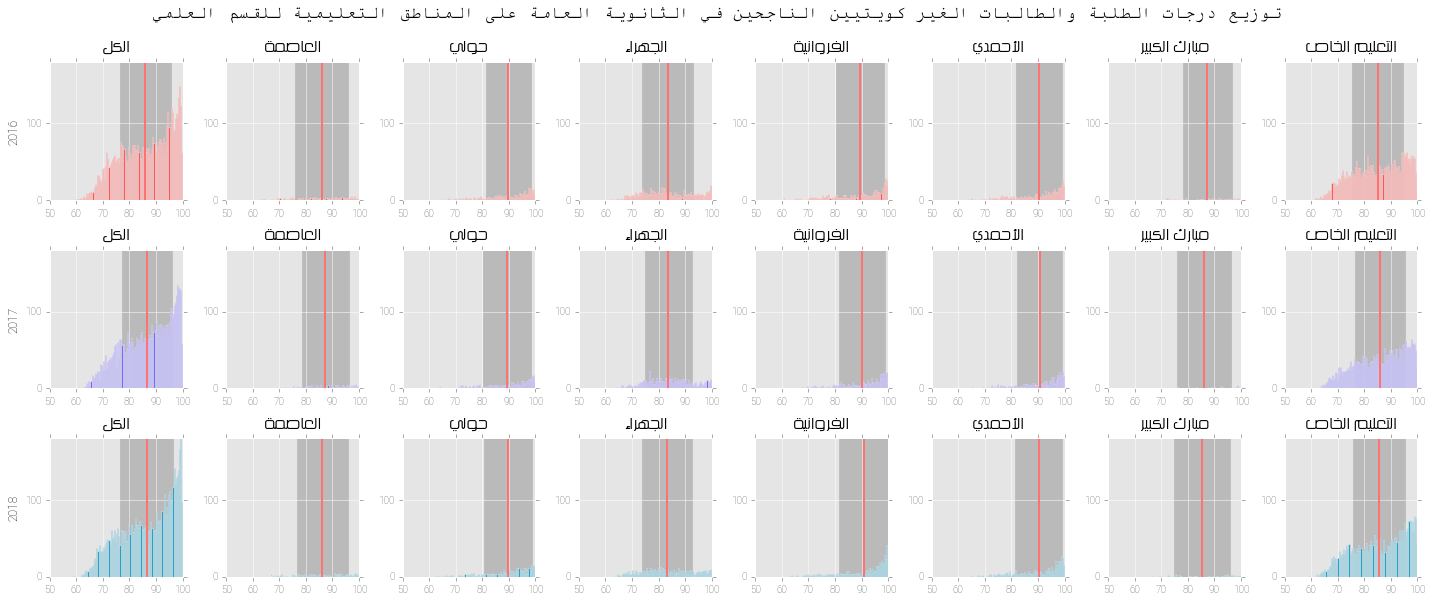

In [115]:
# Expat STEM - by Area Dissection
data_set_list_stem = [data_set_list[0], data_set_list[2], data_set_list[4]]
ncols_ = 8
nrows_ = 3
figstem, axesstem = plt.subplots(figsize=(20, 8), nrows=nrows_, ncols=ncols_) 
axesstem_ = axesstem.flatten() # flatten axes to easily iterate over
suptitle_ = arabic_text(u'توزيع درجات الطلبة والطالبات الغير كويتيين الناجحين في الثانوية العامة على المناطق التعليمية للقسم العلمي' )
bissection_type = 'STEM_Expat_byArea'

for k, data_set in enumerate(data_set_list_stem):
    data_nationality = data_set['df'].loc[data_set['df'][u'الجنسية'] != u'كويتي']
    dissection_list_ = [ [data_nationality, u'الكل'], 
                        [data_nationality.loc[data_set['df'][u'المنطقة'] == u'العاصمة'],  u'العاصمة'], 
                        [data_nationality.loc[data_set['df'][u'المنطقة'] == u'حولي'],  u'حولي'], 
                        [data_nationality.loc[data_set['df'][u'المنطقة'] == u'الجهراء'],  u'الجهراء'], 
                        [data_nationality.loc[data_set['df'][u'المنطقة'] == u'الفروانية'],  u'الفروانية'], 
                        [data_nationality.loc[data_set['df'][u'المنطقة'] == u'الأحمدي'],  u'الأحمدي'], 
                        [data_nationality.loc[data_set['df'][u'المنطقة'] == u'مبارك الكبير'],  u'مبارك الكبير'],
                        [data_nationality.loc[data_set['df'][u'المنطقة'] == u'التعليم الخاص'],  u'التعليم الخاص']]
 

    plot_dissection_histogram_2(dissection_list_, data_set['year'], color_list[k], figstem, axesstem_[k*8:k*8+8], 180)

figstem.suptitle(suptitle_, fontname='Courier New',fontsize=18, y=1.04)
figstem.tight_layout()
figstem.savefig("Figures/" + bissection_type + "_" + "Histograms.svg", bbox_inches='tight')

In [124]:
# STEM by Expat Nationality
# data_set_list[4]['df'][u'الجنسية'].value_counts()

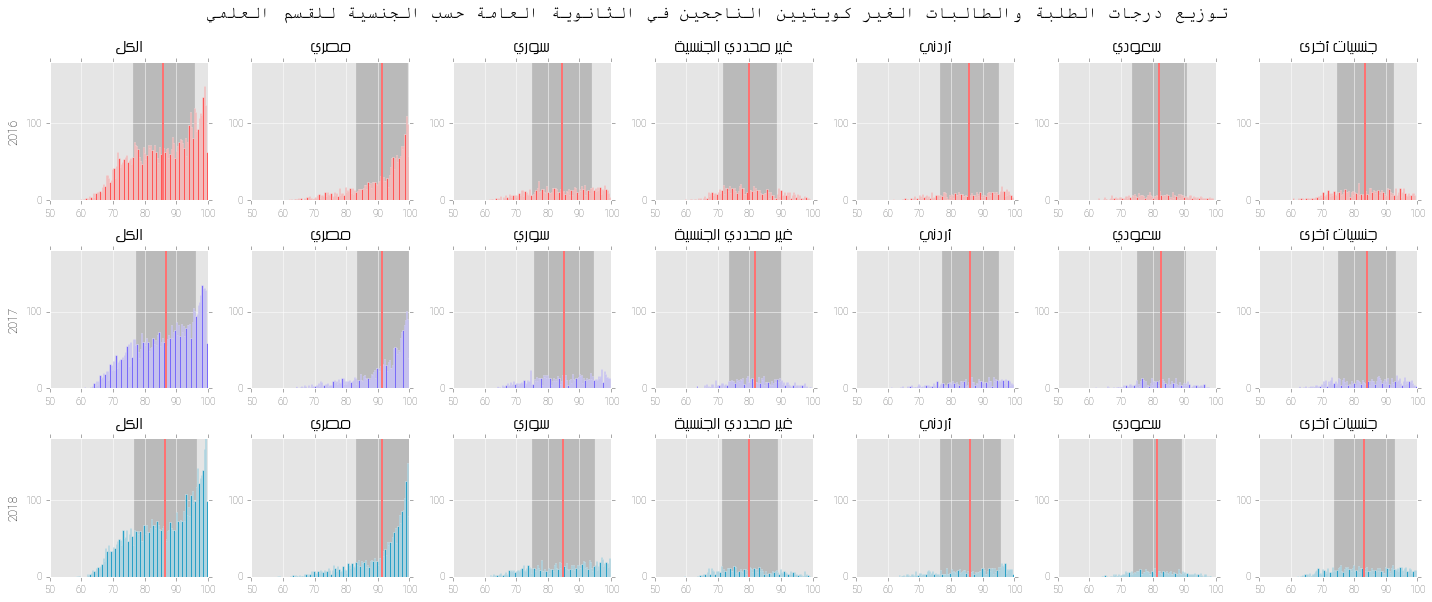

In [123]:
data_set_list_stem = [data_set_list[0], data_set_list[2], data_set_list[4]]
ncols_ = 7
nrows_ = 3
figstem, axesstem = plt.subplots(figsize=(20, 8), nrows=nrows_, ncols=ncols_) 
axesstem_ = axesstem.flatten() # flatten axes to easily iterate over
suptitle_ = arabic_text(u'توزيع درجات الطلبة والطالبات الغير كويتيين الناجحين في الثانوية العامة حسب الجنسية للقسم العلمي' )
bissection_type = 'STEM_Expat_byNationality'

for k, data_set in enumerate(data_set_list_stem):
    data_nationality = data_set['df'].loc[data_set['df'][u'الجنسية'] != u'كويتي']
    dissection_list_ = [ [data_nationality, u'الكل'], 
                        [data_nationality.loc[data_set['df'][u'الجنسية'] == u'مصري'],  u'مصري'], 
                        [data_nationality.loc[data_set['df'][u'الجنسية'] == u'سوري'],  u'سوري'], 
                        [data_nationality.loc[data_set['df'][u'الجنسية'] == u'غير محدد الجنسية'],  u'غير محددي الجنسية'], 
                        [data_nationality.loc[data_set['df'][u'الجنسية'] == u'اردني'],  u'أردني'], 
                        [data_nationality.loc[data_set['df'][u'الجنسية'] == u'سعودي'],  u'سعودي'], 
                        [data_nationality.loc[(data_set['df'][u'الجنسية'] != u'مصري') & (data_set['df'][u'الجنسية'] != u'سوري') & (data_set['df'][u'الجنسية'] != u'غير محدد الجنسية') & 
                                             (data_set['df'][u'الجنسية'] != u'اردني') & (data_set['df'][u'الجنسية'] != u'سعودي')],  u'جنسيات أخرى']]

    plot_dissection_histogram_2(dissection_list_, data_set['year'], color_list[k], figstem, axesstem_[k*ncols_:k*ncols_+ncols_], 180)

figstem.suptitle(suptitle_, fontname='Courier New',fontsize=18, y=1.04)
figstem.tight_layout()
figstem.savefig("Figures/" + bissection_type + "_" + "Histograms.svg", bbox_inches='tight')

In [233]:
display(data_set_list_stem[1]['df']).sort_values(u'الجنس')

,الجنسية,الجنس,المنطقة,حكومي/خاص,المدرسة,النسبة
0,كويتي,بنين,العاصمة,حكــومى,يوسف بن عيسى الثانوية للبنين,76.44
1,كويتي,بنين,العاصمة,حكــومى,يوسف بن عيسى الثانوية للبنين,91.18
2,كويتي,بنين,العاصمة,حكــومى,يوسف بن عيسى الثانوية للبنين,84.74
3,كويتي,بنين,العاصمة,حكــومى,يوسف بن عيسى الثانوية للبنين,90.12
4,كويتي,بنين,العاصمة,حكــومى,يوسف بن عيسى الثانوية للبنين,95.61
5,كويتي,بنين,العاصمة,حكــومى,يوسف بن عيسى الثانوية للبنين,91.45
6,كويتي,بنين,العاصمة,حكــومى,يوسف بن عيسى الثانوية للبنين,88.40
7,كويتي,بنين,العاصمة,حكــومى,يوسف بن عيسى الثانوية للبنين,96.11
8,كويتي,بنين,العاصمة,حكــومى,يوسف بن عيسى الثانوية للبنين,70.37
9,كويتي,بنين,العاصمة,حكــومى,يوسف بن عيسى الثانوية للبنين,85.28


AttributeError: 'NoneType' object has no attribute 'sort_values'

In [7]:
performance_list_stem = []
for k, dataset in enumerate(data_set_list_stem): 
    datasubset = dataset['df'].loc[dataset['df'][u'حكومي/خاص']==u'حكــومى']
    public_school_list_counts = datasubset[u'المدرسة'].value_counts()
    public_school_list = public_school_list_counts.index

    # df_public_schools_data =data_set_list[0]['df'].loc[data_set_list[0]['df'][u'حكومي/خاص']==u'حكــومى']
    df_public_schools_data = datasubset

    df_public_schools_performance = pd.DataFrame(columns=['mean','std','25%', '50%', '75%', 'max', 'count', u'الجنس'], index=public_school_list)
    df_public_schools_performance_myear = [df_public_schools_performance, df_public_schools_performance, df_public_schools_performance]

    df_public_schools_performance.index.name = u'المدرسة'
    k = 0
    for school, row in df_public_schools_performance.iterrows():
        df_school = df_public_schools_data.loc[df_public_schools_data[u'المدرسة'] == school]
        desc = df_school[u'النسبة'].describe()
        row[u'الجنس'] = (df_school[u'الجنس']).iloc[0]
        row['mean'] = desc['mean']
        row['std'] = desc['std']
        row['25%'] = desc['25%']
        row['50%'] = desc['50%']
        row['75%'] = desc['75%']
        row['max'] = desc['max']
        row['count'] = desc['count']

    df_public_schools_performance = (df_public_schools_performance.sort_values('mean', ascending=False))
    performance_list_stem.append(df_public_schools_performance)


In [8]:
# Display Some Results
display(u'ترتيب المدارس الحكومية حسب أداء الطلبة في القسم العلمي لعام 2016')
display(performance_list_stem[0][performance_list_stem[0]['count'] > 25].rename(index=str, columns={u'mean': u'المتوسط الحسابي', 'std': u'الانحراف المعياري'}).head(15))
print('\n\n')
display(u'ترتيب المدارس الحكومية حسب أداء الطلبة في القسم العلمي لعام 2017')
display(performance_list_stem[1][performance_list_stem[1]['count'] > 25].rename(index=str, columns={u'mean': u'المتوسط الحسابي', 'std': u'الانحراف المعياري'}).head(15))
print('\n\n')
display(u'ترتيب المدارس الحكومية حسب أداء الطلبة في القسم العلمي لعام 2018')
display(performance_list_stem[2][performance_list_stem[2]['count'] > 25].rename(index=str, columns={u'mean': u'المتوسط الحسابي', 'std': u'الانحراف المعياري'}).head(15))

'ترتيب المدارس الحكومية حسب أداء الطلبة في القسم العلمي لعام 2016'

,المتوسط الحسابي,الانحراف المعياري,25%,50%,75%,max,count,الجنس
المدرسة,,,,,,,,
الفروانيه الثانوية للبنات,93.2892,6.16782,90.885,95.01,98.345,99.84,100,بنات
النهضه الثانوية للبنات,93.2524,6.08472,89.83,96.01,98.36,99.85,37,بنات
انس بن مالك الثانوية للبنين,92.2249,7.3199,88.7175,95.055,98.1075,99.84,70,بنين
السالمية الثانوية للبنات,91.7354,7.41605,88.31,94.14,97.49,99.65,85,بنات
انيسة بنت خبيب الانصارية الثانوية للبنات - المشتركة,91.6192,8.26832,89.17,94.53,97.79,99.63,85,بنات
المباركية الثانوية للبنين,91.3135,8.17125,84.4725,94.33,98.935,99.85,112,بنين
صفية بنت عبدالمطلب الثانوية للبنات,90.7507,7.87631,85.32,92.68,97.38,99.75,85,بنات
أمة بنت خالد الثانوية للبنات,90.3549,8.51011,84.6525,93.455,97.4025,99.73,134,بنات
الجابرية الثانوية للبنات,89.5592,8.30793,84.675,92.125,96.1,99.56,100,بنات


'ترتيب المدارس الحكومية حسب أداء الطلبة في القسم العلمي لعام 2017'

,المتوسط الحسابي,الانحراف المعياري,25%,50%,75%,max,count,الجنس
المدرسة,,,,,,,,
الفروانيه الثانوية للبنات,93.4623,6.05705,90.45,95.63,97.96,99.94,105,بنات
المباركية الثانوية للبنين,93.4327,6.22262,89.985,95.81,98.135,99.68,112,بنين
النهضه الثانوية للبنات,91.9588,7.75582,89.4075,93.935,98.4825,99.6,34,بنات
انس بن مالك الثانوية للبنين,91.4267,8.69098,88.3275,94.435,97.9025,99.81,64,بنين
انيسة بنت خبيب الانصارية الثانوية للبنات - المشتركة,91.2691,8.15121,86.0075,94.69,98.2025,99.75,88,بنات
السالمية الثانوية للبنات,89.8958,9.9584,82.14,94.44,97.94,99.73,77,بنات
صفية بنت عبدالمطلب الثانوية للبنات,89.8589,8.50228,83.675,92.93,97.205,99.44,80,بنات
الجابرية الثانوية للبنات,89.4895,8.14825,82.505,91.63,96.555,99.45,115,بنات
أمة بنت خالد الثانوية للبنات,89.2346,8.96947,82.8375,91.555,96.7575,99.76,128,بنات


'ترتيب المدارس الحكومية حسب أداء الطلبة في القسم العلمي لعام 2018'

,المتوسط الحسابي,الانحراف المعياري,25%,50%,75%,max,count,الجنس
المدرسة,,,,,,,,
الفروانيه الثانوية للبنات,93.5778,7.71976,92.35,96.69,98.67,99.8,129,بنات
المباركية الثانوية للبنين,91.5902,8.47699,87.86,95.18,97.9125,99.86,132,بنين
انس بن مالك الثانوية للبنين,91.467,8.3407,87.2375,94.33,98.22,99.85,86,بنين
ابرق خيطان الثانوية للبنات,91.1745,7.22781,84.845,93.34,96.6475,99.79,62,بنات
انيسة بنت خبيب الانصارية الثانوية للبنات - المشتركة,91.0931,8.8987,84.93,94.15,98.14,99.86,93,بنات
أمة بنت خالد الثانوية للبنات,90.6767,8.41304,85.4075,93.015,97.99,99.83,134,بنات
السالمية الثانوية للبنات,90.3723,9.23256,85.195,94.195,96.92,99.88,110,بنات
النهضه الثانوية للبنات,90.0309,8.49939,83.105,92.06,97.925,99.5,43,بنات
فهد الدويري الثانوية للبنين,89.0463,8.84648,82.81,91.555,96.775,99.78,100,بنين


In [11]:
performance_list_kuwaitis_stem = []
for k, dataset in enumerate(data_set_list_stem): 
    datasubset = dataset['df'].loc[dataset['df'][u'حكومي/خاص']==u'حكــومى'].loc[dataset['df'][u'الجنسية'] == u'كويتي']
    public_school_list_counts = datasubset[u'المدرسة'].value_counts()
    public_school_list = public_school_list_counts.index

    # df_public_schools_data =data_set_list[0]['df'].loc[data_set_list[0]['df'][u'حكومي/خاص']==u'حكــومى']

    df_public_schools_performance = pd.DataFrame(columns=['mean','std','25%', '50%', '75%', 'max', 'count', u'الجنس'], index=public_school_list)
    df_public_schools_performance_myear = [df_public_schools_performance, df_public_schools_performance, df_public_schools_performance]

    df_public_schools_performance.index.name = u'المدرسة'
    k = 0
    for school, row in df_public_schools_performance.iterrows():
        df_school = datasubset.loc[datasubset[u'المدرسة'] == school]
        desc = df_school[u'النسبة'].describe()
        row[u'الجنس'] = (df_school[u'الجنس']).iloc[0]
        row['mean'] = desc['mean']
        row['std'] = desc['std']
        row['25%'] = desc['25%']
        row['50%'] = desc['50%']
        row['75%'] = desc['75%']
        row['max'] = desc['max']
        row['count'] = desc['count']

    df_public_schools_performance = (df_public_schools_performance.sort_values('mean', ascending=False))
    performance_list_kuwaitis_stem.append(df_public_schools_performance)


In [12]:
# Display Some Results
display(u'ترتيب المدارس الحكومية حسب أداء الطلبة الكويتيين في القسم العلمي لعام 2016')
display(performance_list_kuwaitis_stem[0][performance_list_kuwaitis_stem[0]['count'] > 25].rename(index=str, columns={u'mean': u'المتوسط الحسابي', 'std': u'الانحراف المعياري'}).head(15))
print('\n\n')
display(u'ترتيب المدارس الحكومية حسب أداء الطلبة الكويتيين في القسم العلمي لعام 2017')
display(performance_list_kuwaitis_stem[1][performance_list_kuwaitis_stem[1]['count'] > 25].rename(index=str, columns={u'mean': u'المتوسط الحسابي', 'std': u'الانحراف المعياري'}).head(15))
print('\n\n')
display(u'ترتيب المدارس الحكومية حسب أداء الطلبة الكويتيين في القسم العلمي لعام 2018')
display(performance_list_kuwaitis_stem[2][performance_list_kuwaitis_stem[2]['count'] > 25].rename(index=str, columns={u'mean': u'المتوسط الحسابي', 'std': u'الانحراف المعياري'}).head(15))

'ترتيب المدارس الحكومية حسب أداء الطلبة الكويتيين في القسم العلمي لعام 2016'

,المتوسط الحسابي,الانحراف المعياري,25%,50%,75%,max,count,الجنس
المدرسة,,,,,,,,
قرطبة الثانوية للبنات,89.0877,7.01515,84.09,89.48,95.12,98.75,65,بنات
صفية بنت عبدالمطلب الثانوية للبنات,88.9226,7.99769,84.01,91.82,95.45,98.83,57,بنات
امامه بنت بشر الثانوية للبنات,88.2973,8.23698,82.89,89.08,95.385,98.86,55,بنات
لطيفه عبد الرحمن الفارس الثانوية للبنات,88.1587,6.10327,85.91,88.72,92.895,96.87,75,بنات
ام العلاء الأنصارية الثانوية للبنات,87.9178,7.71877,83.3625,89.88,94.045,98.85,72,بنات
العدان الثانوية للبنات,87.4552,7.2883,81.655,89.415,92.8675,98.6,66,بنات
منيرة الأحمد الجابر الصباح الثانوية بنات,86.9283,7.47168,82.0225,88.915,92.5875,99.38,80,بنات
اليرموك للبنات الثانوية للبنات,86.9115,8.08911,82.595,88.97,93.085,99.4,75,بنات
ريطة بنت الحارث الثانوية بنات,86.8468,7.48281,81.2025,87.355,93.1975,98.63,92,بنات


'ترتيب المدارس الحكومية حسب أداء الطلبة الكويتيين في القسم العلمي لعام 2017'

,المتوسط الحسابي,الانحراف المعياري,25%,50%,75%,max,count,الجنس
المدرسة,,,,,,,,
شريفة العوضي الثانوية للبنات,88.1825,7.17222,84.265,88.72,94.56,98.7,71,بنات
اليرموك للبنات الثانوية للبنات,88.1425,7.596,83.97,90.76,94.03,99.25,69,بنات
درة الهاشمية الثانوية للبنات,88.0351,7.30553,83.66,89.34,94.07,98.86,57,بنات
فاطمة بنت أسد الثانوية للبنات,87.8262,7.34054,83.165,88.02,93.56,99.32,63,بنات
ام العلاء الأنصارية الثانوية للبنات,87.7376,7.77455,82.975,89.29,94.02,98.44,82,بنات
قرطبة الثانوية للبنات,87.2917,7.93723,81.9,89.29,93.7925,98.79,66,بنات
العصماء بنت الحارث الثانوية للبنات,86.7827,7.41422,82.3275,87.34,93.14,99.28,78,بنات
لطيفه عبد الرحمن الفارس الثانوية للبنات,86.6587,6.59469,82.47,88.12,91.14,98.19,79,بنات
اميمة بنت ربيعة الثانوية للبنات,86.569,7.00699,80.6875,85.87,92.21,98.71,52,بنات


'ترتيب المدارس الحكومية حسب أداء الطلبة الكويتيين في القسم العلمي لعام 2018'

,المتوسط الحسابي,الانحراف المعياري,25%,50%,75%,max,count,الجنس
المدرسة,,,,,,,,
ام العلاء الأنصارية الثانوية للبنات,88.2722,6.49034,84.75,88.96,93.125,98.52,74,بنات
جمانه بنت ابى طالب الثانوية للبنات,87.1053,9.07555,81.305,89.13,94.945,99.31,58,بنات
قرطبة الثانوية للبنات,87.0104,7.91072,80.9075,88.12,93.0625,99.33,74,بنات
عبدالله العتيبي الثانوية للبنين,86.461,9.12941,80.03,87.32,95.0025,99.44,94,بنين
الجابرية الثانوية للبنات,86.4104,8.43222,81.195,86.14,94.265,97.95,48,بنات
ابرق خيطان الثانوية للبنات,86.4007,6.56089,81.685,84.46,92.74,96.1,27,بنات
ام عامر الأنصارية الثانوية للبنات,86.3662,8.1199,82.0325,86.97,93.3825,99.51,58,بنات
فاطمة بنت الوليد الثانوية للبنات,86.3021,7.49236,80.42,86.14,92.87,99.04,53,بنات
العصماء بنت الحارث الثانوية للبنات,86.2182,7.33997,80.1775,86.5,91.8625,99.69,82,بنات


In [283]:
data_set_list_stem[0]['df'].loc[data_set_list_stem[0]['df'][u'المدرسة'] == u'الفروانيه الثانوية للبنات '].loc[data_set_list_stem[0]['df'][u'الجنسية'] == u'كويتي']

,الجنسية,الجنس,المنطقة,حكومي/خاص,المدرسة,النسبة
4662,كويتي,بنات,الفروانية,حكــومى,الفروانيه الثانوية للبنات,92.46
4675,كويتي,بنات,الفروانية,حكــومى,الفروانيه الثانوية للبنات,81.20
4683,كويتي,بنات,الفروانية,حكــومى,الفروانيه الثانوية للبنات,96.67
4688,كويتي,بنات,الفروانية,حكــومى,الفروانيه الثانوية للبنات,77.11
4705,كويتي,بنات,الفروانية,حكــومى,الفروانيه الثانوية للبنات,83.15
4706,كويتي,بنات,الفروانية,حكــومى,الفروانيه الثانوية للبنات,87.77
4718,كويتي,بنات,الفروانية,حكــومى,الفروانيه الثانوية للبنات,73.01
4719,كويتي,بنات,الفروانية,حكــومى,الفروانيه الثانوية للبنات,75.67
4724,كويتي,بنات,الفروانية,حكــومى,الفروانيه الثانوية للبنات,91.08
4725,كويتي,بنات,الفروانية,حكــومى,الفروانيه الثانوية للبنات,93.78


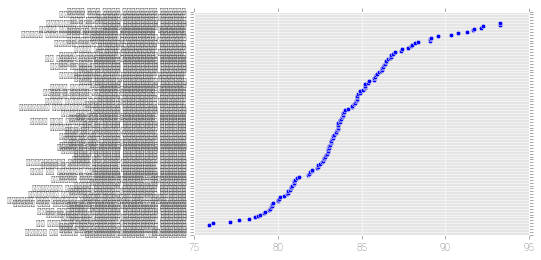

In [214]:
yticks_ = np.arange(1, len(df_public_schools_performance)+1)
yticks_

ax = plt.scatter(df_public_schools_performance['mean'].values, yticks_)
ax.axes.locator_params(axis='y', nbins=100);
ax.axes.set_yticklabels(df_public_schools_performance['mean'].index)

In [201]:
# len(df_public_schools_performance['mean'].values)
len(yticks_)

139

In [185]:
desc = df_school[u'النسبة'].describe()
desc

count     1.00
mean     85.44
std        NaN
min      85.44
25%      85.44
50%      85.44
75%      85.44
max      85.44
Name: النسبة, dtype: float64

In [47]:
pass_rates = [
    {'year': '2013', 'STEM': 90.1, 'Humanities': 86.4},
    {'year': '2014', 'STEM': 90.66, 'Humanities': 79.77},
    {'year': '2015', 'STEM': 91.2, 'Humanities': 86.3},
    {'year': '2016', 'STEM': 87.26, 'Humanities': 86.3},
    {'year': '2017', 'STEM': 80.35, 'Humanities': 75.6},
    {'year': '2018', 'STEM': 69.8, 'Humanities': 63.89}
]